In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
ds = pd.read_csv("Admission_Predict.csv")
ds

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [18]:
x = ds.iloc[:,:-1]
y = ds.iloc[:,-1]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [20]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [30]:
reg = LinearRegression()
reg.fit(x_train,y_train)

pred = reg.predict(x_test)
test_set_mse = mean_squared_error(y_test,pred)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)
print(test_set_rmse)
print(test_set_r2)

0.06320166708152682
0.8046723363381834


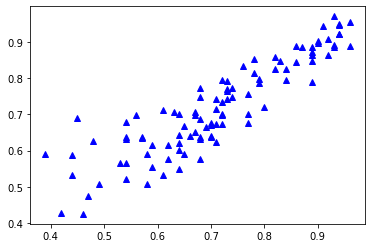

In [31]:
plt.plot(y_test,pred,'^',color='blue');

In [32]:
print("Squared Mean Error= ", test_set_mse)
print("Root Squared Mean Error= ", test_set_rmse)
print("Coefficient of Determination= ", test_set_r2)

Squared Mean Error=  0.003994450721884151
Root Squared Mean Error=  0.06320166708152682
Coefficient of Determination=  0.8046723363381834


In [33]:
print("Accuracy Acheived= ", test_set_r2*100,"%!")

Accuracy Acheived=  80.46723363381834 %!
